### 1. Serialize and Deserialize Tree/BST/BT

In [ ]:
class Codec:

    def serialize(self, root: TreeNode) -> str:
        """Encodes a tree to a single string.
        """
        if root is None:
            return 'X,'
        left = self.serialize(root.left)
        right = self.serialize(root.right)
        return str(root.val)+','+left+right
        

    def deserialize(self, data: str) -> TreeNode:
        """Decodes your encoded data to tree.
        """
        q = data.split(',')
        def helper(q):
            front = q.pop(0)
            if front == 'X':
                return None
            newNode = TreeNode(int(front))
            newNode.left = helper(q)
            newNode.right = helper(q)
            return newNode
        return helper(q)

### 2. Traversals

In [3]:
class Node:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key
def preorder(root):
    if root:
        print(root.val)
        preorder(root.left)
        preorder(root.right)
def inorder(root):
    if root:
        inorder(root.left)
        print(root.val)
        inorder(root.right)
def postorder(root):
    if root:
        postorder(root.left)
        postorder(root.right)
        print(root.val)
# iterative
def preorderTraversal(node):
    stack = []
    stack.append(node)
    ans = []
    while len(stack) > 0:
        temp = stack.pop()
        ans.append(temp.val)
        if temp.right != None:
            stack.append(temp.right)
        if temp.left != None:
            stack.append(temp.left)

    return ans

def inorderTraversal(A):
    stack = []
    result = []
    node = A
    while(stack or node):
        if node:
            stack.append(node)
            node = node.left
        else:
            node = stack.pop()
            result.append(node.val)
            node = node.right
    #print(self.result)
    return result
def postorderTraversal(A):
    result = []; d = [A]
    while d:
        node = d.pop()
        if node:
            result.append(node.val)
            d.append(node.left)
            d.append(node.right)
    return result[::-1]
root = Node(1) 
root.left      = Node(2) 
root.right     = Node(3) 
root.left.left  = Node(4) 
root.left.right  = Node(5) 
print("Preorder traversal of binary tree is")
preorder(root) 
  
print("\nInorder traversal of binary tree is")
inorder(root) 
  
print("\nPostorder traversal of binary tree is")
postorder(root) 

Preorder traversal of binary tree is
1
2
4
5
3

Inorder traversal of binary tree is
4
2
5
1
3

Postorder traversal of binary tree is
4
5
2
3
1


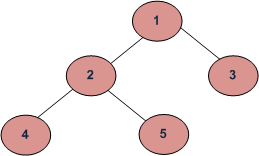

### 3. Left View of a Binary Tree

In [37]:
def leftviewutill(root,level,maxlevel): #
    if root is None:
        return
    if maxlevel[0] < level:
        print(root.val,end = ' ')
        maxlevel[0] = level
    leftviewutill(root.left,level+1,maxlevel)
    leftviewutill(root.right,level+1,maxlevel)
    #leftviewutill(root.left,level+1,maxlevel) # to get right view of the tree and comment out the left part and uncomment this part
def leftview(root):
    maxlevel = [0]                             # we took maxlevel as array not varible because it changes values globally
    leftviewutill(root,1,maxlevel)
leftview(root)



1 2 4 

In [35]:
def preorderleftView(root,level,visited):
    if root:
        if visited[level] != 1:
            print(root.val,end = " ")
            visited[level] = 1
        preorderleftView(root.left,level+1,visited)
        preorderleftView(root.right,level+1,visited)
def leftviewPreOrder(root):
    h = height(root)
    visited = [ 0 for i in range(h)]
    preorderleftView(root,0,visited)
leftviewPreOrder(root)  
    

1 2 4 

### 4. level order traversal

In [9]:
def levelOrder(root):
    queue = [root]
    while len(queue) != 0 :
        temp = queue.pop(0)
        print(temp.val,end = "->")
        if temp.left:
            queue.append(temp.left)
        if temp.right:
            queue.append(temp.right)
levelOrder(root)
            
    

1->2->3->4->5->

In [23]:
def levelOrderRecursion(root,level):
    if root is None:
        return 
    if level == 1:
        print(root.val,end = "->")
    elif level>1:
        levelOrderRecursion(root.left,level-1)
        levelOrderRecursion(root.right,level-1)
def levelOrderRecurMain(root):
    h = height(root)
    for i in range(1,h+1):
        levelOrderRecursion(root,i)
levelOrderRecurMain(root)

1->2->3->4->5->

### 5. height of Binary Tree

In [14]:
def height(root):
    if root is None:
        return 0
    return max(height(root.left)+1,height(root.right)+1)
height(root)        

3

### 6. Diameter of Binary tree
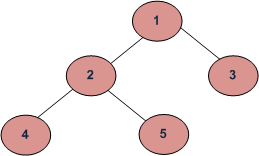

In [45]:
def diameter(root,res):
    if root is None:
        return 0
    l = diameter(root.left,res)
    r = diameter(root.right,res)
    temp = max(l,r)
    temp+=1
    ans = max(temp,l+r+1)
    res[0] = max(res[0],ans)
    return temp
res = [float('-inf')]
diameter(root,res)
print(res[0])
def diameter(root,res):
    if root is None:
        return 0
    l = diameter(root.left,res)
    r = diameter(root.right,res)
    temp = max(left,right)
    temp+=1
    ans = max(temp,l+r+1)
    res[0] = max(res[0,ans])
    return temp
        

4


### 7. Balanced binary Tree or not i.e AVL tree or not

In [51]:
def isBAlanced(root):
    if root is None:
        return True
    lh = height(root.left)
    rh = height(root.right)
    if abs(lh-rh) <=1 and isBAlanced(root.left) and isBAlanced(root.right):
        return True
    return False
isBAlanced(root)

True

root = Node(1) 
root.left = Node(2) 
root.right = Node(3) 
root.left.left = Node(4) 
root.left.right = Node(5) 
root.left.left.left = Node(8)


### 8. Identical Binary Tree or not

In [54]:
def isIdentical(root1,root2):
    if root1 is None and root2 is None:
        return True
    if root1 is not None and root2 is not None:
        return ((root1.val == root2.val) and isIdentical(root1.left,root2.left) and isIdentical(root1.right,root2.right))
    return False
root1 = Node(1) 
root2 = Node(1) 
root1.left = Node(2) 
root1.right = Node(3) 
root1.left.left = Node(4) 
root1.left.right = Node(5) 
  
root2.left = Node(2) 
root2.right = Node(3) 
root2.left.left = Node(4) 
root2.left.right = Node(5) 
  
if isIdentical(root1, root2): 
    print("Both trees are identical")
else: 
    print("Trees are not identical")

Both trees are identical


### 9. LCA(lowest comman ancestor)

In [59]:
def lca(root,x,y):
    if root is None:
        return None
    if root.val == x or root.val == y :
        return root
    leftresult = lca(root.left,x,y)
    rightresult = lca(root.right,x,y)
    if leftresult is None:
        return rightresult
    if rightresult is None:
        return leftresult
    return root
res = lca(root,3,3) 
print(res.val)

3


### 10. maximum avg subtree

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.children = []
        

class Solution: 
    def MaxAverageSubtree(self, root):
        if not root or not root.children:
            return None
        
        self.res = [float('-inf'), 0]
        # self.res[0]: average; self.res[1]: number of nodes
        self.dfs(root)
        return self.res[1]
    
    def dfs(self, root):
        if not root.children:
            return [root.val, 1]
        
        temp_sum, temp_num = root.val, 1
        for child in root.children:
            child_sum, child_num = self.dfs(child)
            temp_sum += child_sum
            temp_num += child_num
            
        if temp_sum/temp_num > self.res[0]:
            self.res = [temp_sum/temp_num, root.val]
        
        return [temp_sum, temp_num]

### 11. Maximum Path Sum any Node to any Node

In [ ]:
import sys
sys.setrecursionlimit(1000000)
class Solution:
    def maxPathSum(self, root: TreeNode) -> int:
        res = [float("-inf")]
        def solve(root,res):
            if root is None:
                return 0
            l = solve(root.left,res)
            r = solve(root.right,res)
            temp = max((max(l,r)+root.val),root.val)
            ans  = max(temp,l+r+root.val)
            res[0] = max(ans,res[0])
            return temp
        solve(root,res)
        return res[0]

### 12. Maximum Path Sum leaf to leaf

In [7]:
def solve(root,res):
    if root is None:
        return 0
    l = solve(root.left,res)
    r = solve(root.right,res)
    temp = max(l,r) + root.val
    '''
    # just for the concept
    if root.left is None and root.right is None:
        temp = max(temp,root.val)
    '''
    ans = max(temp,l+r+root.val)
    res[0] = max(ans,res[0])
    return temp
res = [float("-inf")]
solve(root,res)
print(res[0])
    

11


### 13. Path Sum
root to leaf sum exist or not

In [9]:
class Solution:
    def hasPathSum(self, root: Node, sum: int) -> bool:
        def helper(root,target):
            if root is None:
                return False
            elif root.right is None and root.left is None and (target - root.val) == 0:
                return True
            else:
                return helper(root.left,target-root.val) or helper(root.right,target-root.val)
        return helper(root,sum)
                

### 14. Construct Binary Tree using Preorder and inorder

In [10]:
'''
def Construct(A,B):
    if len(B) == 0:
        return
    root = Node(A[0])
    for i in range(len(B)):
        if B[i] == A[0]:
            root.left = Construct(A[1:],)
            root.right = Construct()        
    
    return root
def solve(preorder,inorder):
    for i in range(len(preorder)):
        for j in range(len(inorder)):
'''

'\ndef Construct(A,B):\n    if len(B) == 0:\n        return\n    root = Node(A[0])\n    for i in range(len(B)):\n        if B[i] == A[0]:\n            root.left = Construct(A[1:],)\n            root.right = Construct()        \n    \n    return root\ndef solve(preorder,inorder):\n    for i in range(len(preorder)):\n        for j in range(len(inorder)):\n'

### 15. Flatten the binary tree

In [11]:
def flatten(root):
    if root is None:
        return
    flatten(root.left)
    flatten(root.right)
    if root is not None:
        curr = root.left
        while curr.right is not None:
            curr = curr.right
        curr.right = root.right
        root.right = root.left
        root.left = None

### 16. Mirror of Binary Tree(Symmetric)

In [13]:
def Mirror(root1,root2):
    if root1 is None and root2 is None:
        return True
    if root1 is not None and root2 is not None:
        return root1.val == root2.val and Mirror(root1.left,root2.right) and Mirror(root1,right,root2,left)
    return False

In [ ]:
def Identical(root1,root2):
    if root1 is None and root2 is None:
        return True
    if root1 is not None and root2 is not None:
        return root1.val == root2.val and Mirror(root1.left,root2.left) and Mirror(root1.right,root2.right)
    return False

In [2]:
ord('z')

122

In [1]:
a = [1, 5, 3, 4, 6]


In [3]:
sorted(a) == a

False